In [1]:
import pandas as pd
import xlwings as xl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
characteristics = xl.Book ('Weekly_Data_Counts.csv')                                

In [3]:
sheet = characteristics.sheets[0]

# Excel chart

In [4]:
chart = sheet.charts.add()
chart.set_source_data(sheet.range('B3').expand())
chart.chart_type = 'line'
chart.top = sheet.range('J2').top

In [5]:
chart.legend = sheet.range('C2:G5').value

# Matplotlib

In [6]:
# need to defne data frame
test = sheet.range('B3:G15').value
test

[['2020-10', 0.0, 0.0, 12.0, 5.0, 24.0],
 ['2020-11', 0.0, 0.0, 50.0, 74.0, 88.0],
 ['2020-12', 0.0, 4.0, 250.0, 291.0, 405.0],
 ['2020-13', 7.0, 5.0, 626.0, 785.0, 1039.0],
 ['2020-14', 10.0, 9.0, 622.0, 989.0, 1368.0],
 ['2020-15', 10.0, 9.0, 594.0, 882.0, 1388.0],
 ['2020-16', 12.0, 7.0, 716.0, 905.0, 1497.0],
 ['2020-17', 8.0, 15.0, 726.0, 768.0, 1395.0],
 ['2020-18', 8.0, 16.0, 694.0, 757.0, 1231.0],
 ['2020-19', 7.0, 17.0, 636.0, 663.0, 936.0],
 ['2020-20', 6.0, 9.0, 430.0, 442.0, 613.0],
 ['2020-21', 0.0, 0.0, 0.0, 0.0, 0.0],
 ['2020-22', 0.0, 0.0, 0.0, 0.0, 0.0]]

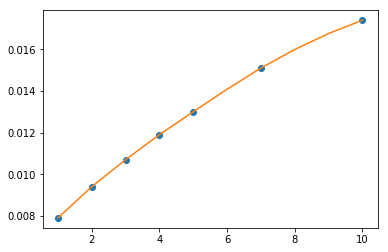

In [7]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# Swap rate example
years = [1, 2, 3, 4, 5, 7, 10]
swap_rate = [0.0079, 0.0094, 0.0107, 0.0119,
             0.013, 0.0151, 0.0174]
years_new = np.linspace(1, 10, num=10)
interpolate = interp1d(years, swap_rate, kind='quadratic')

fig = plt.figure(figsize=(6, 4))
swaprate_plot = plt.plot(years, swap_rate, 'o',
                         years_new, interpolate(years_new), '-')

In [8]:
test_df = pd.DataFrame(data=test, columns=['Week Number','0-4 Years', '5-17 Years', '18-49 Years', '50-64 Years', '65+ Years'])
test_df

,Week Number,0-4 Years,5-17 Years,18-49 Years,50-64 Years,65+ Years
0,2020-10,0.0,0.0,12.0,5.0,24.0
1,2020-11,0.0,0.0,50.0,74.0,88.0
2,2020-12,0.0,4.0,250.0,291.0,405.0
3,2020-13,7.0,5.0,626.0,785.0,1039.0
4,2020-14,10.0,9.0,622.0,989.0,1368.0
5,2020-15,10.0,9.0,594.0,882.0,1388.0
6,2020-16,12.0,7.0,716.0,905.0,1497.0
7,2020-17,8.0,15.0,726.0,768.0,1395.0
8,2020-18,8.0,16.0,694.0,757.0,1231.0
9,2020-19,7.0,17.0,636.0,663.0,936.0


In [9]:
X = test_df.iloc[:,0:13]
Y = test_df['Week Number']
correlations = test_df.corr()
correlations

,0-4 Years,5-17 Years,18-49 Years,50-64 Years,65+ Years
0-4 Years,1.000000,0.714430,0.934360,0.962076,0.965554
5-17 Years,0.714430,1.000000,0.850801,0.739180,0.762133
18-49 Years,0.934360,0.850801,1.000000,0.965164,0.968543
50-64 Years,0.962076,0.739180,0.965164,1.000000,0.985216
65+ Years,0.965554,0.762133,0.968543,0.985216,1.000000


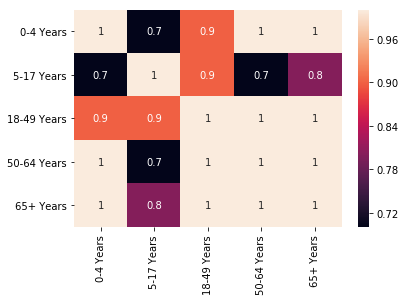

In [10]:
sns.heatmap(correlations.round(1), annot=True)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.3,
                                                   train_size=0.7,
                                                   random_state=23)

NameError: name 'y' is not defined

In [12]:
X_train.head()

NameError: name 'X_train' is not defined

In [13]:
X_train.shape

NameError: name 'X_train' is not defined

In [14]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [15]:
lm.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [16]:
test_df.describe()

,0-4 Years,5-17 Years,18-49 Years,50-64 Years,65+ Years
count,13.000000,13.00000,13.000000,13.000000,13.000000
mean,5.230769,7.00000,412.000000,504.692308,768.000000
std,4.567163,6.23164,302.879514,383.839894,601.136562
min,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,50.000000,74.000000,88.000000
50%,7.000000,7.00000,594.000000,663.000000,936.000000
75%,8.000000,9.00000,636.000000,785.000000,1368.000000
max,12.000000,17.00000,726.000000,989.000000,1497.000000


In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 6 columns):
Week Number    13 non-null object
0-4 Years      13 non-null float64
5-17 Years     13 non-null float64
18-49 Years    13 non-null float64
50-64 Years    13 non-null float64
65+ Years      13 non-null float64
dtypes: float64(5), object(1)
memory usage: 704.0+ bytes


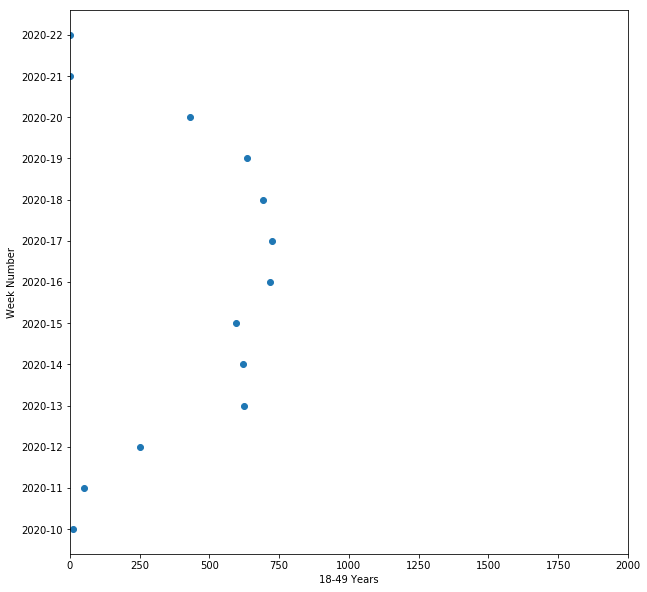

In [18]:
plt.figure(figsize=(10,10))
selected_data = test_df.loc[:, ['Week Number','0-4 Years', '5-17 Years', '18-49 Years']]
x = selected_data['18-49 Years']
y = selected_data['Week Number']
plt.scatter(x, y)
plt.xlim(0,2000)
plt.xlabel('18-49 Years')
plt.ylabel('Week Number')
plt.show()

#  Medical Condtions

In [19]:
Medical_conditions = xl.Book('Medical_Conditions.csv')

In [20]:
sheet1 = Medical_conditions.sheets[0]
test1 = sheet1.range('B3:C16').value
test_df1 = pd.DataFrame(data=test1, columns=['Medical Condition','Percentage'])
test_df1

,Medical Condition,Percentage
0,Asthma,9
1,Cardiovascular disease,1
2,Chronic lung disease,N/A
3,Immune suppression,N/A
4,Metabolic disease,1
5,Neurologic disease,3
6,Other disease,5
7,No known condition,16
8,Autoimmune disease,N/A
9,Obesity,9


In [21]:
sorted_data = test_df1.sort_index(by='Medical Condition', ascending=True)
sorted_data

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


,Medical Condition,Percentage
0,Asthma,9
8,Autoimmune disease,N/A
1,Cardiovascular disease,1
2,Chronic lung disease,N/A
12,Gastrointestinal/liver disease,1
13,Hypertension,2
3,Immune suppression,N/A
4,Metabolic disease,1
5,Neurologic disease,3
7,No known condition,16


                 Medical Condition  Percentage
0                           Asthma        12.3
8              Autoimmune disease          2.9
1           Cardiovascular disease        35.4
2             Chronic lung disease        22.2
12  Gastrointestinal/liver disease         5.0
13                    Hypertension        58.6
3               Immune suppression        10.5
4                Metabolic disease        42.6
5               Neurologic disease        23.1
7               No known condition         7.9
9                          Obesity        49.5
6                    Other disease         5.5
10                       Pregnancy         0.0


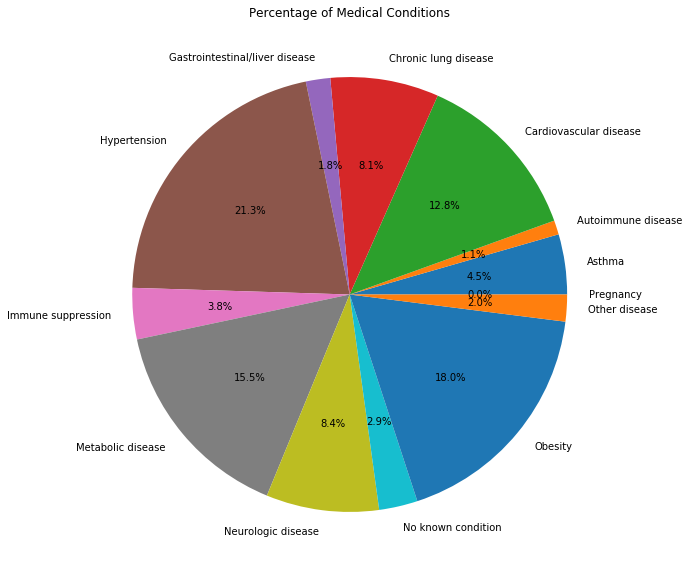

In [9]:
output_data = sorted_data.iloc[:13]
print(output_data)
plt.figure(figsize=(10,10))
plt.pie(output_data['Percentage'],
       labels=output_data['Medical Condition'],
       autopct='%1.1f%%' )
plt.title('Percentage of Medical Conditions')
plt.show()

In [27]:
plt.fig.output_data.savefig('medical conditions.jpg', transparent=False, dpi=100, bbox_inches="tight")

AttributeError: module 'matplotlib.pyplot' has no attribute 'fig'